In [2]:
import numpy as np
import matplotlib.pyplot as plt

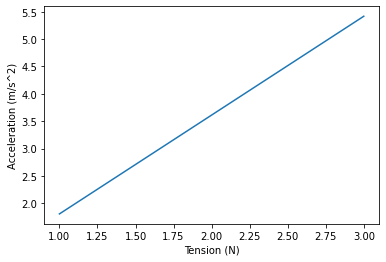

In [3]:
m = 0.25
g = 9.80524
r1 = 0.015
r2 = 0.045
mu_s_max = 0.60

# Calculate moment of inertia
A_inner = np.pi*r1**2
A_outer = np.pi*r2**2
A_total = A_inner+2*A_outer

m_inner = A_inner/A_total*m
m_outer = 2*A_outer/A_total*m

I_inner = 0.5*m_inner*r1**2
I_outer = 0.5*m_outer*r2**2
I = I_inner+I_outer

npts = 21

T = np.zeros(npts)
ax = np.zeros(npts)
mu = np.zeros(npts)


# Case 2:  Pulling to the right

for i in range(npts):
    T[i]=1.0+i/(npts-1)*2.0
    ax[i] = T[i]*(r2-r1)/(I/r2+m*r2)
    mu[i] = (T[i]-m*ax[i])/(m*g)
    
    
plt.plot(T,ax)
plt.xlabel('Tension (N)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

Text(0, 0.5, 'Coefficient of Friction')

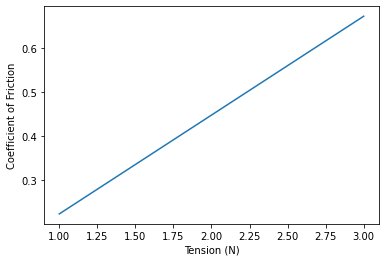

In [4]:
plt.plot(T,mu)
plt.xlabel('Tension (N)')
plt.ylabel('Coefficient of Friction')

1.470786
theta_critical =  56.61


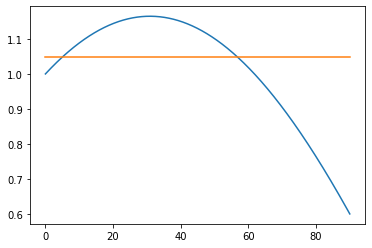

In [54]:
# Case 3:  Pulling to the right at an angle, theta

print (mu_s_max*m*g)

lhs = np.zeros(1000)
rhs = np.zeros(1000)
theta_c = np.zeros(1000)

T = 1.4

flag = True
for j in range(1000,0,-1):
    theta_c[j-1] = j/1000.00*90.0
    theta_c_r = theta_c[j-1]*np.pi/180.0
    fval = np.cos(theta_c_r)+mu_s_max*np.sin(theta_c_r)-mu_s_max*m*g/T
    lhs[j-1]=np.cos(theta_c_r)+mu_s_max*np.sin(theta_c_r)
    rhs[j-1]=mu_s_max*m*g/T
    if fval>=0.0 and flag:
        theta_critical=theta_c[j-1]
        flag=False
        
plt.plot(theta_c,lhs)
plt.plot(theta_c,rhs)
print ('theta_critical = ',theta_critical)